## Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## About the dataset:
This [data article](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) describes a datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). the dataset contains 32 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. the dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, this dataset can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields. 
You can download the Hotel Booking Demand dataset from the Kaggle [click here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

## Attribute Information:
- **hotel**: Hotel (Resort Hotel, City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_date_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**: Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 32)

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Does the type of payment affect the cancellation of the reservation or not?

In [11]:
print(df.deposit_type.value_counts())
df.reservation_status.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64


Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [14]:
fig1 = px.histogram(df, x="deposit_type", color="reservation_status", title="Deposit Type vs Reservation Status")
fig1.show()
# We can see that most of the bookings are no deposit type and most of the reservation status are check_out.

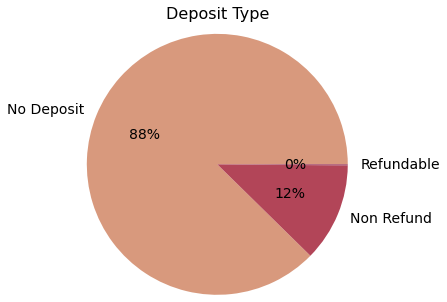

### Insights:
- Yes it does, We can see that most of the bookings are no deposit type and most of the reservation status are check_out.
- on the other hand, if the payment is non refundable, most of the reservations are canceled.

## Does length of time between the entering date of the booking and the arrival date affect the cancellation?

In [37]:
df[df['cancelation_percentage'] >0][['cancelation_percentage', 'previous_cancellations','previous_bookings_not_canceled']].tail(10)

,cancelation_percentage,previous_cancellations,previous_bookings_not_canceled
107997,0.500000,1,1
107998,0.500000,1,1
108000,0.500000,1,1
108001,0.500000,1,1
108830,0.500000,1,1
111356,0.200000,1,4
111357,0.166667,1,5
111358,0.142857,1,6
111359,0.125000,1,7
111925,0.500000,1,1


In [ ]:
df['cancelation_percentage'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'])
df['cancelation_percentage'].fillna(0, inplace=True)

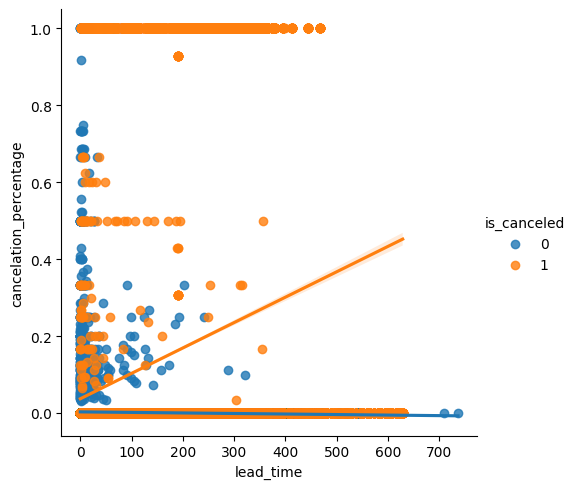

In [39]:
# calculate cancelation percentage for each row
sns.lmplot(df, x='lead_time', y='cancelation_percentage', hue='is_canceled')

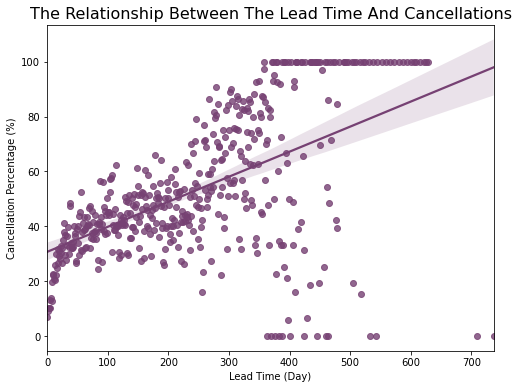

### Insights:
- as time time increases, the cancelation percentage increase.
- there are a lot of reservations that have high percentage of canceling.



## Which months that have lowest number of visitors?

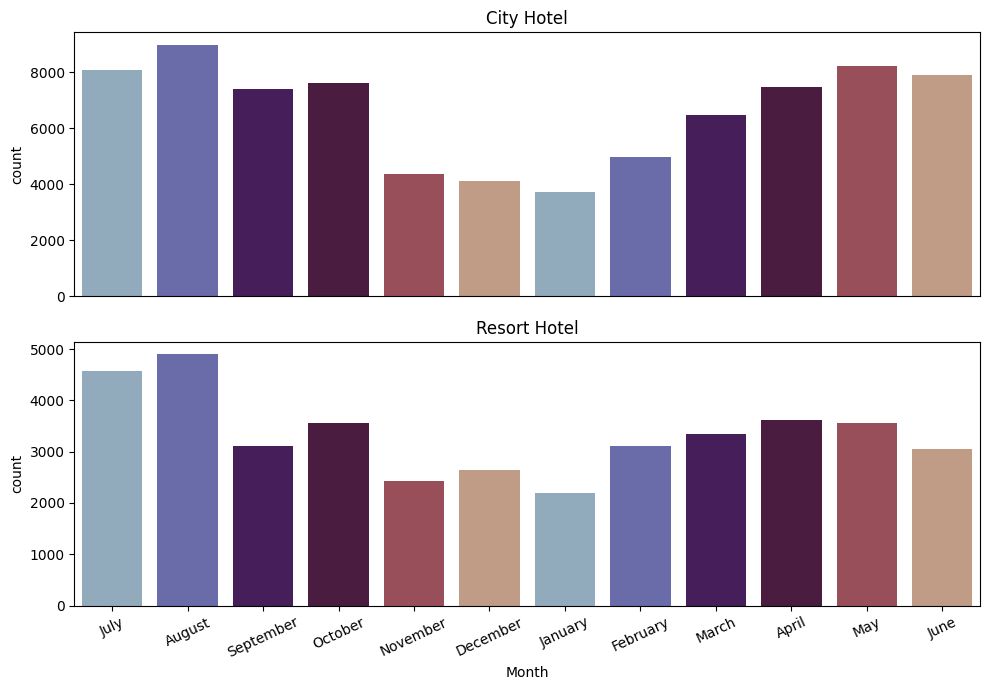

In [105]:
plt.figure(figsize=[10,7])

plt.subplot(2,1,1)
sns.countplot( x=df[df['hotel'] == 'City Hotel']['arrival_date_month'],palette=sns.color_palette('twilight'))
plt.xticks([])
plt.xlabel('')
plt.title('City Hotel')

plt.subplot(2,1,2)
sns.countplot(df, x=df[df['hotel'] == 'Resort Hotel']['arrival_date_month'], palette=sns.color_palette('twilight'))
plt.title('Resort Hotel')
plt.xlabel('Month')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

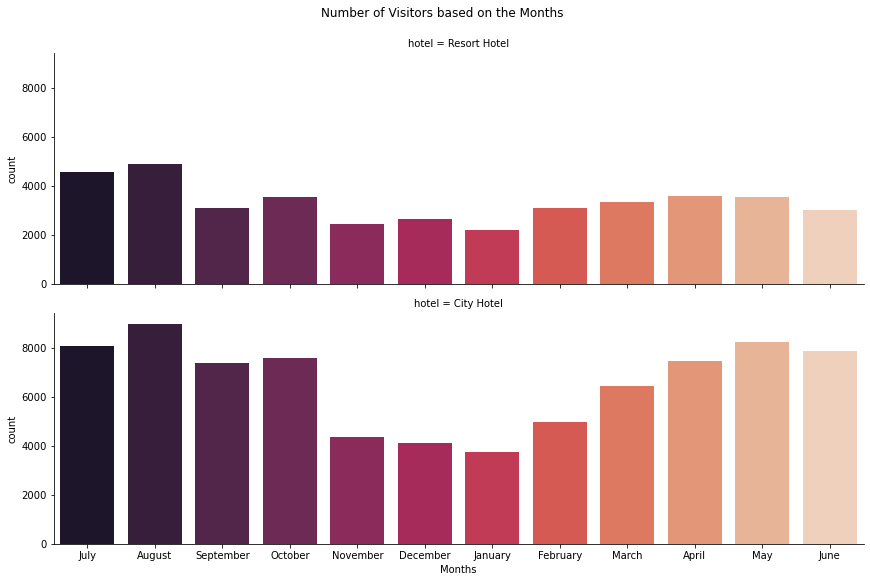

## Check if the lowest number of visitors due to the increase in the number of the canceled reservations?

In [106]:
canceled0 = df[df['is_canceled'] == 0]
canceled1 = df[df['is_canceled'] == 1]

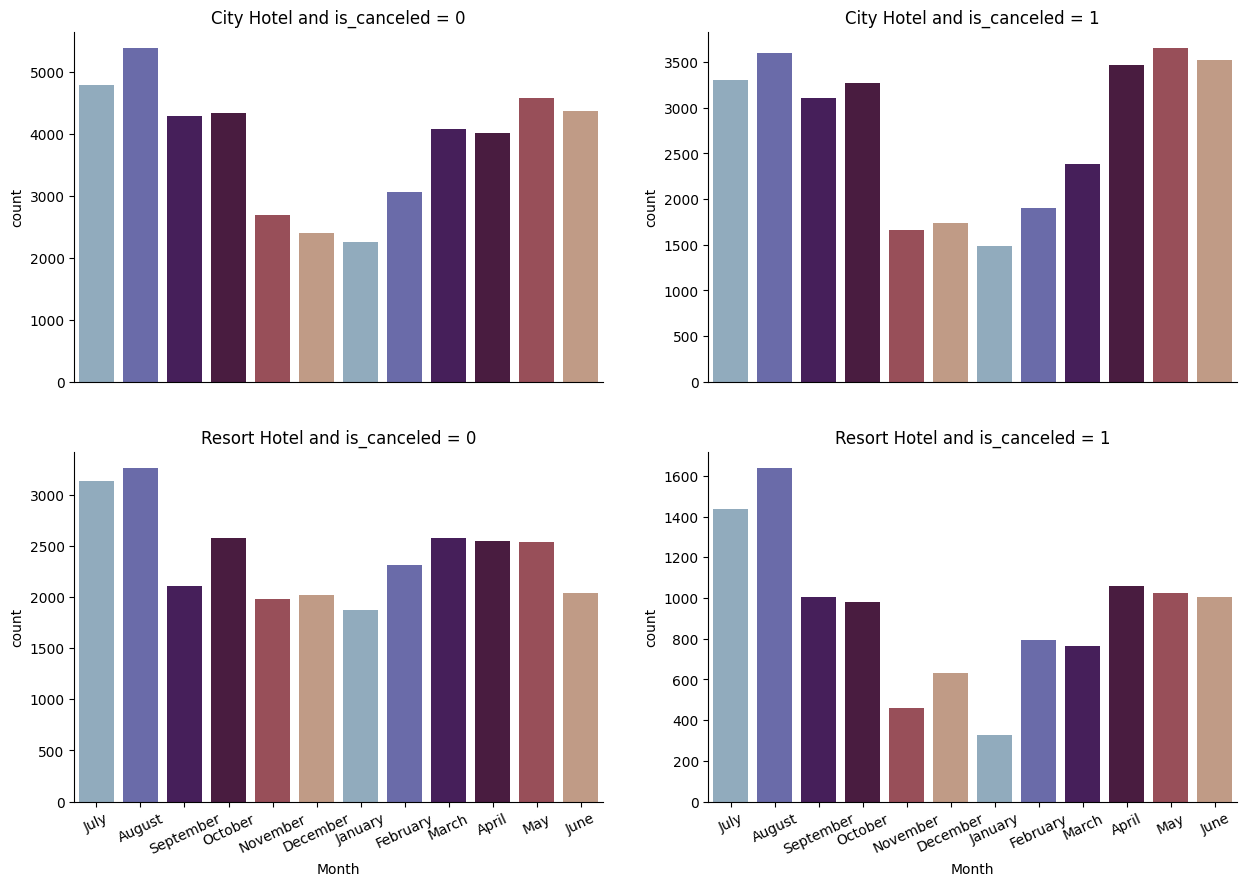

In [184]:
plt.figure(figsize=[15,10])

plt.subplot(2,2,1)
sns.countplot(x=canceled0[canceled0['hotel'] == 'City Hotel']['arrival_date_month'],palette=sns.color_palette('twilight'))
plt.xticks([])
plt.xlabel('')
plt.title('City Hotel and is_canceled = 0')

plt.subplot(2,2,3)
sns.countplot(x=canceled0[canceled0['hotel'] == 'Resort Hotel']['arrival_date_month'], palette=sns.color_palette('twilight'))
plt.title('Resort Hotel and is_canceled = 0')
plt.xlabel('Month')
plt.xticks(rotation=25)
#------------------------------------------------------------ canceled 0

plt.subplot(2,2,2)
sns.countplot(x=canceled1[canceled1['hotel'] == 'City Hotel']['arrival_date_month'],palette=sns.color_palette('twilight'))
plt.xticks([])
plt.xlabel('')
plt.title('City Hotel and is_canceled = 1')

plt.subplot(2,2,4)
sns.countplot(x=canceled1[canceled1['hotel'] == 'Resort Hotel']['arrival_date_month'], palette=sns.color_palette('twilight'))
plt.title('Resort Hotel and is_canceled = 1')
plt.xlabel('Month')
plt.xticks(rotation=25)

sns.despine()
plt.show()

In [122]:
# # create subplot in plotly
# from plotly.subplots import make_subplots
# fig = make_subplots(rows=2, cols=2, subplot_titles=("City Hotel", "Resort Hotel"))

# fig.add_trace(px.histogram(x=canceled0[canceled0['hotel'] == 'City Hotel']['arrival_date_month']).data[0],
#                 row=1, col=1)
# fig.add_trace(px.histogram(x=canceled0[canceled0['hotel'] == 'Resort Hotel']['arrival_date_month'], title="Hotel vs is_canceled").data[0],
#                 row=2, col=1)
# fig.add_trace(px.histogram(x=canceled1[canceled1['hotel'] == 'City Hotel']['arrival_date_month'], title="Hotel vs is_canceled").data[0],
#                 row=1, col=2)
# fig.add_trace(px.histogram(x=canceled1[canceled1['hotel'] == 'Resort Hotel']['arrival_date_month'], title="Hotel vs is_canceled").data[0],
#                 row=2, col=2)
# fig.update_layout(height=600, width=800, title_text="Hotel vs is_canceled")
# fig.
# fig.show()


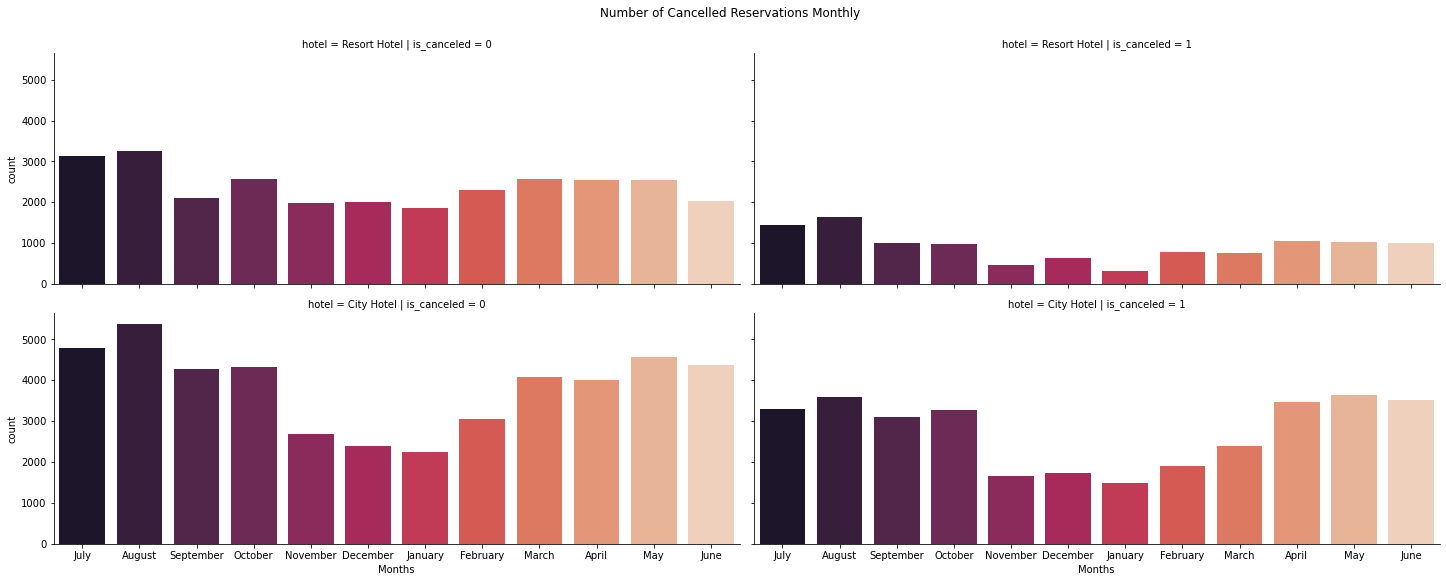

### Insights:
- Resort hotels in canceled reservations are lower than city's
- In Augest, City hotels are the most visited 


## Which top 10 countries that visitors come from?      

In [123]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'cancelation_percentage'],
      dtype='object')

In [125]:
df.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [163]:
top10 = df.country.value_counts()[:10]
top10.index = top10.index.map({'PRT': 'Portugal', 'GBR': 'UK', 'USA': 'United States', 'ESP': 'Spain',
                         'IRL': 'Ireland', 'FRA': 'France', 'DEU': 'Germany', 'ITA': 'Italy', 'BRA': 'Brazil',
                         'NLD': 'Netherlands', 'BEL': 'Belgium'})
top10

Portugal       48590
UK             12129
France         10415
Spain           8568
Germany         7287
Italy           3766
Ireland         3375
Belgium         2342
Brazil          2224
Netherlands     2104
Name: country, dtype: int64

In [166]:
#labels={'PRT': 'Portugal', 'GBR': 'UK', 'FRA': 'France', 'ESP': 'Spain', 'DEU': 'Germany', 'ITA': 'Italy', 'IRL': 'Ireland', 'BEL': 'Belgium', 'BRA': 'Brazil', 'NLD': 'Netherlands'}
pie = px.pie(values=top10.values,names=top10.index, title='Top 10 Countries',
              color_discrete_sequence=px.colors.sequential.RdBu)
pie.update_traces(textposition='inside', textinfo='percent+label',)
pie.show()

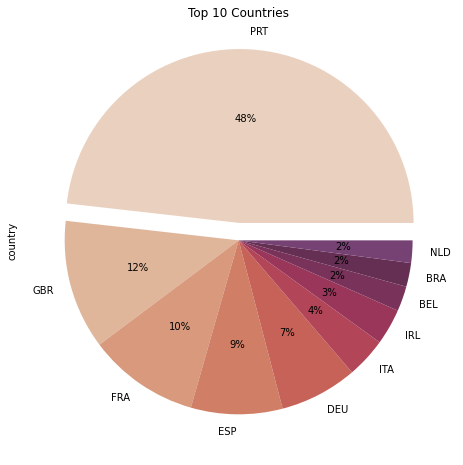

### Insights:
- Portugal is the highest country
- Netherlands is the lowest


## Relation between booking changes and cancelling the reservation

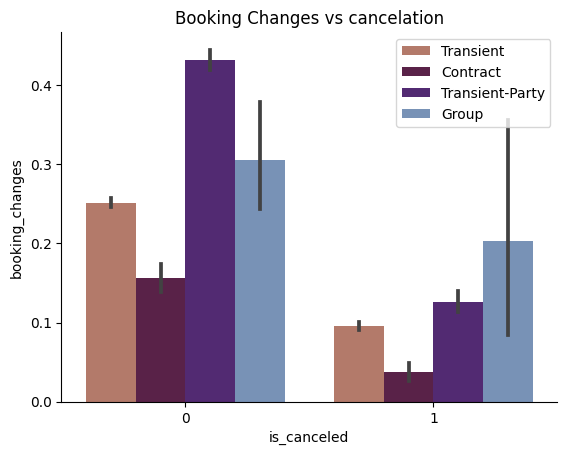

In [181]:
hist = sns.barplot(df, x='is_canceled', y='booking_changes', hue='customer_type', palette='twilight_r')
hist.set_title('Booking Changes vs cancelation')
hist.legend(loc='upper right')
sns.despine()
plt.show()

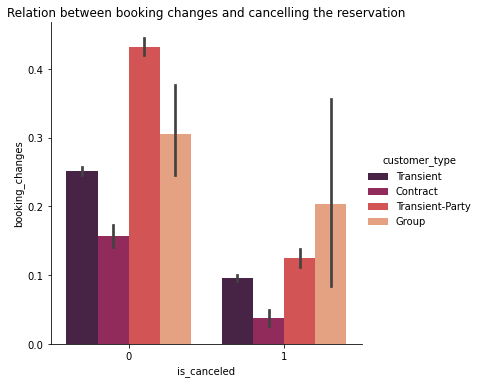

### Insights:
- if the reservation is canceled booking changes is lower than not canceled
- Transient-Party in not canceled is the highest of them

# Data Preprocessing

In [185]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [186]:
# Drop the columns with null values
df = df.drop(['agent' ,'company', 'country'], axis=1, errors="ignore")

In [187]:
df.dropna(subset = ["children"], inplace=True)

In [190]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [193]:
df = df.drop(['hotel','arrival_date_month','meal','customer_type',
              'market_segment', 'distribution_channel','assigned_room_type',
              'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 
              'reservation_status_date', 'cancelation_percentage'], axis=1, errors="ignore")

In [194]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object

In [195]:
X, y = df.drop(['is_canceled'],axis=1), df['is_canceled']

### Choose any machine learning algorithm to predict cancellation 
- use train-test split

In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
rfr = RandomForestRegressor(n_estimators=120, random_state=42)

In [197]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [201]:
y_pred = rfr.predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')

MAE = 0.213801448829882


## Try to use the following techniques: PCA, pipelines, and Grid Search to enhance your model accuracy.

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [204]:
pipe_line = make_pipeline(StandardScaler(),
                     PCA(n_components=3),
                     RandomForestRegressor(n_estimators=120))

pipe_line.fit(X_train, y_train)
pipe_line.score(X_test, y_test)

0.31578097229734436

In [205]:
grid_parameters = {
    'randomforestregressor__n_estimators': [100, 120, 140],
    'pca__n_components': [2, 3, 4],
    'randomforestregressor__max_depth': [None, 5, 10, 15],
    'randomforestregressor__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    pipe_line, 
    param_grid=grid_parameters, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train,y_train)
# it took 26 minutes and 32 seconds to run this cell :)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=  39.6s
[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=  39.9s
[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=  40.2s
[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=  42.9s
[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=100; total time=  43.4s
[CV] END pca__n_components=2, randomforestregressor__max_depth=None, randomforestregressor__min_samples_split=2, randomforestregressor_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(n_estimators=120))]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 3, 4],
                         'randomforestregressor__max_depth': [None, 5, 10, 15],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 120,
                                                                 140]},
             verbose=2)

In [208]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.sort_values(by = ['rank_test_score'])[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_randomforestregressor__max_depth,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,40.005244,0.647037,0.531358,0.014542,4,None,5,140,"{'pca__n_components': 4, 'randomforestregresso...",0.378769,0.395376,0.405372,0.402950,0.408373,0.398168,0.010611,1
73,34.328681,0.609522,0.484920,0.020136,4,None,2,120,"{'pca__n_components': 4, 'randomforestregresso...",0.419295,0.410260,0.360554,0.385722,0.401242,0.395415,0.020658,2
75,28.430051,0.302426,0.390611,0.017731,4,None,5,100,"{'pca__n_components': 4, 'randomforestregresso...",0.409314,0.368252,0.416397,0.395575,0.385506,0.395009,0.017139,3
76,34.134186,0.309641,0.456176,0.017327,4,None,5,120,"{'pca__n_components': 4, 'randomforestregresso...",0.408107,0.397775,0.388231,0.394514,0.380727,0.393871,0.009197,4
72,30.137191,0.459369,0.428954,0.020309,4,None,2,100,"{'pca__n_components': 4, 'randomforestregresso...",0.401466,0.394061,0.401980,0.390548,0.373067,0.392225,0.010524,5
79,33.779112,0.356937,0.453309,0.018987,4,None,10,120,"{'pca__n_components': 4, 'randomforestregresso...",0.409004,0.409652,0.399305,0.368968,0.372200,0.391826,0.017757,6
78,28.208010,0.151414,0.372519,0.012575,4,None,10,100,"{'pca__n_components': 4, 'randomforestregresso...",0.406356,0.378582,0.394205,0.370319,0.408041,0.391501,0.014947,7
80,40.377822,0.488421,0.521075,0.027742,4,None,10,140,"{'pca__n_components': 4, 'randomforestregresso...",0.394983,0.396589,0.394738,0.382739,0.386425,0.391095,0.005481,8
74,39.748072,0.159686,0.553812,0.016700,4,None,2,140,"{'pca__n_components': 4, 'randomforestregresso...",0.410590,0.414860,0.376437,0.408313,0.327906,0.387621,0.032829,9
101,35.841145,0.389460,0.419694,0.036735,4,15,2,140,"{'pca__n_components': 4, 'randomforestregresso...",0.393793,0.386648,0.373517,0.368371,0.346744,0.373815,0.016287,10


In [209]:
print(f'Best score: {grid.best_score_}')
print(f'Best parameters: {grid.best_params_}')

Best score: 0.39816767832142796
Best parameters: {'pca__n_components': 4, 'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 140}
